## Is the corrolation distance biased?
In their notes, [Collaborative Filtering Recommender Systems](http://herbrete.vvv.enseirb-matmeca.fr/IR/CF_Recsys_Survey.pdf), the authors state that "Pearson correlation suffers from computing high similarity
between users with few ratings in common". This is just a little experiment, trying to verfy their claim using simulation. So far, the result does not agree with that statement. 
We construct a random rating matrix, with ratings between 0 to 5, where 0 dentes no rating. 

In [1]:
import numpy as np

In [2]:
#Reduce item_cnt and usr_cnt
item_cnt=50 #how many items?
usr_cnt=10000 #homw many users?
R=np.random.randint(0,6,size=(usr_cnt,item_cnt))

In [3]:
R1=np.random.choice(4, size=(usr_cnt/2,item_cnt), p=[0.8, 0.2/3, 0.2/3, 0.2/3])
R2=np.random.choice(4, size=(usr_cnt/2,item_cnt), p=[0.6, .4/3, 0.4/3, 0.4/3])
R=np.concatenate((R1, R2), axis=0)
print(R.shape)

(10000, 50)


/Users/pejman/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
/Users/pejman/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


In [4]:
#removes rows that are entirly 0 (because they cause problem when computing the correlation)
for x in -np.sort(-np.arange(R.shape[0])):
    if np.sum(R[x,:])==0:
        R=np.delete(R,x,0)
    #cor=np.delete(np.delete(cor,x,1),x,0)
print(R.shape)

(10000, 50)


In [5]:
R

array([[2, 1, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [1, 0, 0, ..., 3, 3, 0],
       [0, 0, 0, ..., 3, 3, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [6]:
def incommon_cnt(i,j):
    return(len(np.nonzero(R[i,:]*R[j,:])[0]))

In [7]:
#i_j pairs the indices of all 2 users
#L[i,j] indicates how many items user i and user j have in common and
usr_cnt=R.shape[0]-1
i_j=list(zip(np.repeat(range(usr_cnt), usr_cnt),np.tile(range(usr_cnt), usr_cnt)))
L=np.zeros((usr_cnt,usr_cnt),dtype=np.int)
for x in i_j:
    L[x[0],x[1]]=incommon_cnt(x[0],x[1])

In [8]:
#corfnc give correlation if non
def corfnc(i,j,rnd=2):
    return round(np.corrcoef(R[i,:],R[j,:])[1,0],rnd)

In [9]:
#cor[i,j] indicates the correlation between their ratings
cor=np.zeros((usr_cnt,usr_cnt))
for x in i_j:
    cor[x[0],x[1]]=corfnc(x[0],x[1])

In [14]:
from collections import defaultdict as ddict
d = ddict(list)
for i in range(L.shape[0]):
    for j in np.arange(i+1,L.shape[1]):
        d[L[i,j]].append((i,j))

In [15]:
a= ddict(list)
for k in d.keys():
    a[k]=[round(cor[x[0],x[1]],2) for x in d[k]]

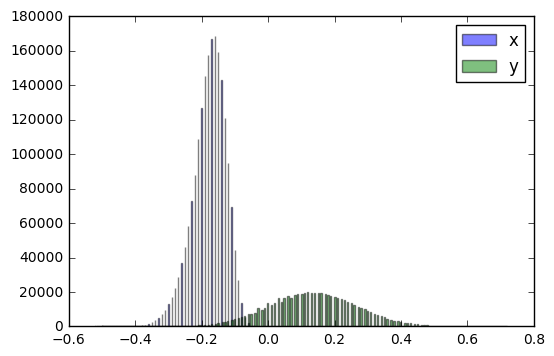

In [25]:
#as we see there are more users in a[0]
x=a[0]
y=a[13]+a[14]+a[15]+a[16]+a[17]+a[18]+a[19]+a[20]+a[21]+a[22]+a[23]+a[24]
import matplotlib.pyplot as plt
plt.hist(x,bins='auto', alpha=0.5, label='x')
plt.hist(y,bins='auto',alpha=0.5, label='y')
plt.legend(loc='upper right')
plt.show()
